# Logistic Regression using Linear Regression

Since there are often times when you want to model the probability of an event directly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from scipy import stats

graph.style.use('fivethirtyeight')

/Users/srose/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


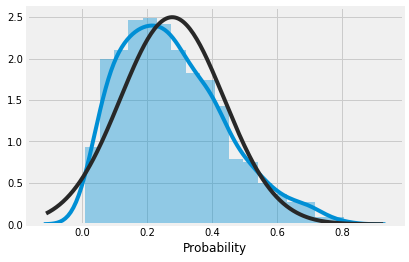

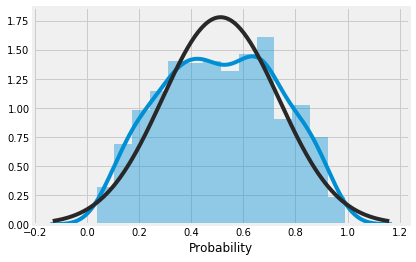

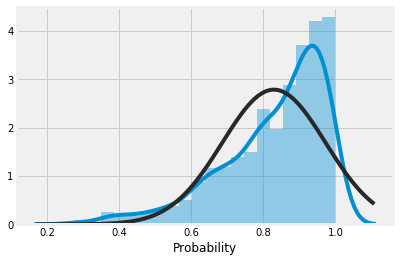

In [2]:
a = stats.beta(2, 5).rvs(1000)
b = stats.beta(2, 2).rvs(1000)
c = stats.beta(5, 1).rvs(1000)

dists = [a, b, c]

for dist_i in dists:
    sns.distplot(dist_i, fit=stats.norm)
    graph.xlabel('Probability')
    graph.show()

## If...

$$ z = {{x - \mu} \over {s}} $$

And in the logistic CDF is...

$$ CDF(\mu, s) = {{1} \over {1 + e^-({{x - \mu} \over {s}})}} $$

Then we can replace the Z score section with z and say that the CDF(z) is the estimated probability ($p$) of the event occuring.

$$ p = CDF(z) = {{1} \over {1 + e^{-z} }} $$

Remember that in logistic regression we use the logistic CDF to transform the output of any model whose output is $\mathbb{R}$.

In logistic regression for example the model is $ z = Xm $

**Now here is where things get awesome (for me)**

If you have a _probabilities_ instead you will want use linear regression and therefore you will need to transform the probabilities to numbers you could use them properly in linear regression. That is we need to convert probability back to logit Zs, let's call this an inverse logit

if...

$$ p = {{1} \over {1 + e^{-z} }} $$

$$ z = -ln \bigg({1 \over p} - 1 \bigg) $$

In [3]:
def inverse_logit(p):
    return -np.log((1/p)-1)

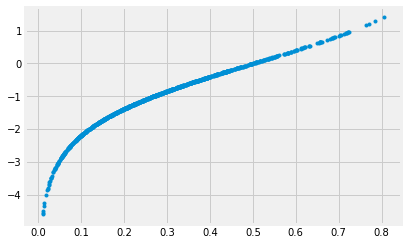

/Users/srose/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


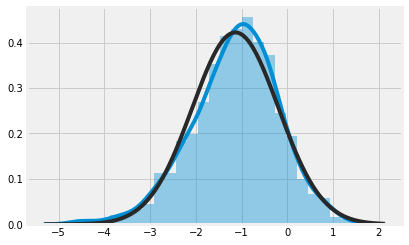

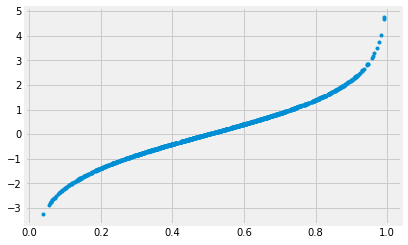

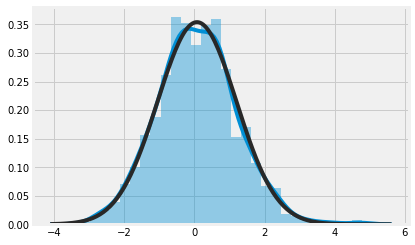

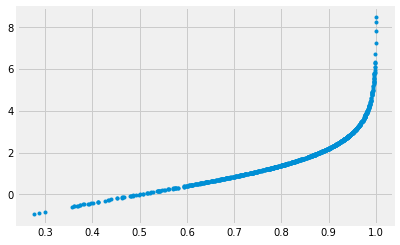

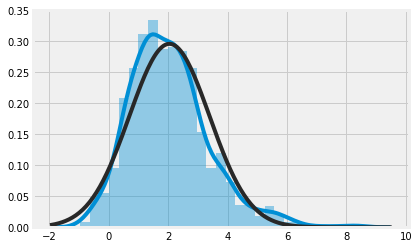

In [4]:
for dist_i in dists:
    graph.plot(dist_i, inverse_logit(dist_i), '.')
    graph.show()
    
    sns.distplot(inverse_logit(dist_i), fit=stats.norm)
    graph.show()

## Showing the Equvalance of Linear and Logistic Regression for Predicting Probability

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression, LogisticRegression

In [6]:
x, y = load_breast_cancer(return_X_y=True)
print(x.shape, y.shape)

(569, 30) (569,)


In [7]:
logit = LogisticRegression().fit(x, y)
print(logit.coef_)

[[ 2.14255611e+00  1.19509857e-01 -7.76065614e-02 -2.63952341e-03
  -1.55150939e-01 -4.12221000e-01 -6.55000796e-01 -3.43525103e-01
  -2.27461843e-01 -2.68287285e-02 -2.12777314e-02  1.29020735e+00
   1.95855311e-02 -9.66546553e-02 -1.68391816e-02  1.00285617e-03
  -5.13777284e-02 -4.04958496e-02 -4.29002319e-02  5.92543569e-03
   1.29601147e+00 -3.48075791e-01 -1.20237099e-01 -2.47712838e-02
  -2.87288179e-01 -1.17582446e+00 -1.62124781e+00 -6.62235441e-01
  -6.99945260e-01 -1.18401588e-01]]


/Users/srose/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


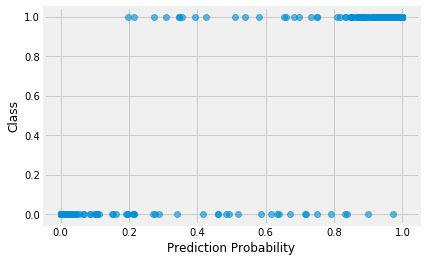

,y,prob
101,1,9.985489e-01
567,0,5.884602e-11
174,1,9.997404e-01
516,0,8.088813e-06
433,0,4.525790e-08
472,1,8.709204e-01
386,1,9.959861e-01
96,1,9.995406e-01
552,1,9.573929e-01
224,1,9.422958e-01


In [8]:
y_prob = logit.predict_proba(x)[:, 1]

graph.plot(y_prob, y, 'o', alpha=0.6)
graph.ylabel('Class')
graph.xlabel('Prediction Probability')
graph.show()

display(pd.DataFrame({'y': y, 'prob': y_prob}).sample(10))

In [9]:
linear = LinearRegression().fit(x, inverse_logit(y_prob))
print(linear.coef_)

[ 2.14255611e+00  1.19509857e-01 -7.76065614e-02 -2.63952341e-03
 -1.55150939e-01 -4.12221000e-01 -6.55000796e-01 -3.43525103e-01
 -2.27461843e-01 -2.68287285e-02 -2.12777314e-02  1.29020735e+00
  1.95855311e-02 -9.66546553e-02 -1.68391816e-02  1.00285618e-03
 -5.13777284e-02 -4.04958496e-02 -4.29002319e-02  5.92543564e-03
  1.29601147e+00 -3.48075791e-01 -1.20237099e-01 -2.47712838e-02
 -2.87288179e-01 -1.17582446e+00 -1.62124781e+00 -6.62235441e-01
 -6.99945260e-01 -1.18401588e-01]


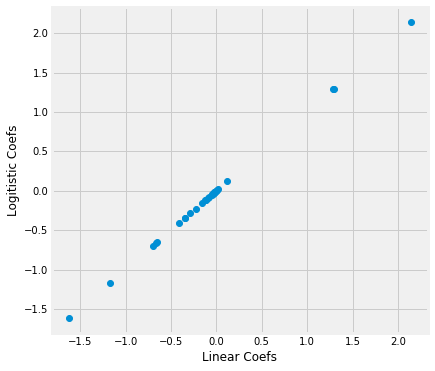

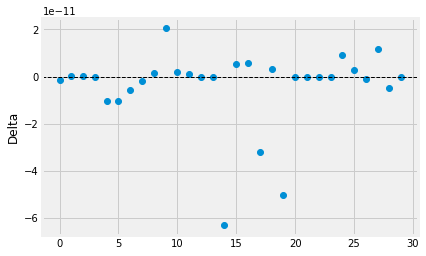

In [10]:
graph.figure(figsize=(6, 6))
graph.plot(linear.coef_, logit.coef_.flatten(), 'o')
graph.ylabel('Logitistic Coefs')
graph.xlabel('Linear Coefs')
graph.show()

graph.plot(linear.coef_ - logit.coef_.flatten(), 'o')
graph.axhline(0, linestyle='--', linewidth=1, color='black')
graph.ylabel('Delta')
graph.show()

From yo boy, _Stephen_